In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import random as rd
import plotly.express as px

In [2]:
df = pd.read_csv("../data_folder/rainfall_actual.csv")
df.head()

,Unnamed: 0,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,6,ANDAMAN & NICOBAR ISLANDS,1902,Actual,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,9,ANDAMAN & NICOBAR ISLANDS,1903,Actual,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,12,ANDAMAN & NICOBAR ISLANDS,1904,Actual,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,15,ANDAMAN & NICOBAR ISLANDS,1905,Actual,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [3]:
df_2014 = df[df["YEAR"] == 2014]
df_2014.head()

,Unnamed: 0,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
108,327,ANDAMAN & NICOBAR ISLANDS,2014,Actual,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4
205,621,ARUNACHAL PRADESH,2014,Actual,19.0,101.9,80.3,86.7,299.0,415.8,392.4,599.6,343.0,35.1,20.1,10.2
320,969,ASSAM & MEGHALAYA,2014,Actual,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4
435,1317,BIHAR,2014,Actual,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2
550,1665,CHHATTISGARH,2014,Actual,2.3,29.0,21.4,17.3,25.0,104.9,416.7,327.7,252.7,77.9,2.6,1.1


In [4]:
df_2014 = df_2014.drop(["YEAR", "Unnamed: 0"], axis=1) 
df_2014["Kharif"] = df_2014["JUN"] + df_2014["JUL"] + df_2014["AUG"] + df_2014["SEP"]
df_2014

,SUBDIVISION,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Kharif
108,ANDAMAN & NICOBAR ISLANDS,Actual,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4,1618.7
205,ARUNACHAL PRADESH,Actual,19.0,101.9,80.3,86.7,299.0,415.8,392.4,599.6,343.0,35.1,20.1,10.2,1750.8
320,ASSAM & MEGHALAYA,Actual,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,1705.6
435,BIHAR,Actual,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2,848.5
550,CHHATTISGARH,Actual,2.3,29.0,21.4,17.3,25.0,104.9,416.7,327.7,252.7,77.9,2.6,1.1,1102.0
665,COASTAL ANDHRA PRADESH,Actual,0.4,1.2,9.1,6.0,112.9,45.7,151.8,177.8,144.5,195.6,23.7,6.4,519.8
780,COASTAL KARNATAKA,Actual,0.0,0.3,1.9,40.5,181.9,507.0,1155.4,1121.0,379.3,226.4,40.0,30.8,3162.7
895,EAST MADHYA PRADESH,Actual,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9,746.6
1010,EAST RAJASTHAN,Actual,28.4,10.0,6.4,7.3,8.4,23.5,197.1,261.0,136.9,3.2,0.0,1.1,618.5
1125,EAST UTTAR PRADESH,Actual,47.4,25.8,15.4,1.7,10.7,47.8,224.5,138.1,106.7,74.7,0.0,8.4,517.1


In [5]:
df_2014["Rabi"] = df_2014["OCT"] + df_2014["NOV"] + df_2014["DEC"] + df_2014["JAN"]+df_2014["FEB"]
df_2014["Winter"] = df_2014["DEC"] + df_2014["JAN"]+df_2014["FEB"]
df_2014["Summer"] = df_2014["APR"] + df_2014["MAY"] + df_2014["JUN"]
df_2014["Autumn"] = df_2014["SEP"] + df_2014["OCT"] + df_2014["NOV"]
df_2014

,SUBDIVISION,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Kharif,Rabi,Winter,Summer,Autumn
108,ANDAMAN & NICOBAR ISLANDS,Actual,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4,1618.7,754.7,150.9,665.7,1016.7
205,ARUNACHAL PRADESH,Actual,19.0,101.9,80.3,86.7,299.0,415.8,392.4,599.6,343.0,35.1,20.1,10.2,1750.8,186.3,131.1,801.5,398.2
320,ASSAM & MEGHALAYA,Actual,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,1705.6,68.7,30.7,829.0,458.2
435,BIHAR,Actual,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2,848.5,99.5,51.7,219.8,208.1
550,CHHATTISGARH,Actual,2.3,29.0,21.4,17.3,25.0,104.9,416.7,327.7,252.7,77.9,2.6,1.1,1102.0,112.9,32.4,147.2,333.2
665,COASTAL ANDHRA PRADESH,Actual,0.4,1.2,9.1,6.0,112.9,45.7,151.8,177.8,144.5,195.6,23.7,6.4,519.8,227.3,8.0,164.6,363.8
780,COASTAL KARNATAKA,Actual,0.0,0.3,1.9,40.5,181.9,507.0,1155.4,1121.0,379.3,226.4,40.0,30.8,3162.7,297.5,31.1,729.4,645.7
895,EAST MADHYA PRADESH,Actual,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9,746.6,153.0,94.7,99.4,197.9
1010,EAST RAJASTHAN,Actual,28.4,10.0,6.4,7.3,8.4,23.5,197.1,261.0,136.9,3.2,0.0,1.1,618.5,42.7,39.5,39.2,140.1
1125,EAST UTTAR PRADESH,Actual,47.4,25.8,15.4,1.7,10.7,47.8,224.5,138.1,106.7,74.7,0.0,8.4,517.1,156.3,81.6,60.2,181.4


In [6]:
df_actual = df_2014

In [8]:
df = pd.read_csv("../data_folder/rainfall_per_dep.csv")
df_2014 = df[df["YEAR"] == 2014]
df_2014 = df_2014.drop(["YEAR", "Unnamed: 0"], axis=1) 
df_2014["Rabi"] = df_2014["OCT"] + df_2014["NOV"] + df_2014["DEC"] + df_2014["JAN"] + df_2014["FEB"]
df_2014["Kharif"] = df_2014["JUN"] + df_2014["JUL"] + df_2014["AUG"] + df_2014["SEP"]
df_2014["Winter"] = df_2014["DEC"] + df_2014["JAN"]+df_2014["FEB"]
df_2014["Summer"] = df_2014["APR"] + df_2014["MAY"] + df_2014["JUN"]
df_2014["Autumn"] = df_2014["SEP"] + df_2014["OCT"] + df_2014["NOV"]
df_per_dep = df_2014
df_per_dep

,SUBDIVISION,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Rabi,Kharif,Winter,Summer,Autumn
108,ANDAMAN & NICOBAR ISLANDS,Percentage departure,-14.9,-68.9,-100.0,-84.6,-33.1,-11.6,17.6,-19.7,-4.3,39.1,-13.6,-34.5,-92.8,-18.0,-118.3,-129.3,21.2
205,ARUNACHAL PRADESH,Percentage departure,-60.5,9.5,-48.3,-67.3,-17.9,-36.8,-44.6,19.9,-20.9,-82.4,-44.8,-58.8,-237.0,-82.4,-109.8,-122.0,-148.1
320,ASSAM & MEGHALAYA,Percentage departure,-88.4,-12.2,-63.5,-74.9,2.1,-16.8,-25.2,19.6,35.3,-77.4,-89.0,-95.2,-362.2,12.9,-195.8,-89.6,-131.1
435,BIHAR,Percentage departure,26.1,132.3,-17.1,-96.0,97.8,-34.4,-19.0,2.1,-26.9,-24.4,-100.0,-68.2,-34.2,-78.2,90.2,-32.6,-151.3
550,CHHATTISGARH,Percentage departure,-83.9,48.7,38.0,7.2,16.8,-47.2,4.1,-16.3,16.8,22.2,-78.6,-79.0,-170.6,-42.6,-114.2,-23.2,-39.6
665,COASTAL ANDHRA PRADESH,Percentage departure,-95.1,-91.1,-33.1,-77.2,79.6,-63.0,-12.8,1.4,-20.7,5.2,-69.3,-45.5,-295.8,-95.1,-231.7,-60.6,-84.8
780,COASTAL KARNATAKA,Percentage departure,-100.0,-78.1,-68.7,36.2,47.0,-39.8,2.4,58.5,28.3,23.1,-36.6,145.1,-46.5,49.4,-33.0,43.4,14.8
895,EAST MADHYA PRADESH,Percentage departure,66.5,167.5,33.7,-28.6,-73.6,-33.9,-23.9,-37.5,-28.9,43.4,-85.7,49.2,240.9,-124.2,283.2,-136.1,-71.2
1010,EAST RAJASTHAN,Percentage departure,350.3,89.0,55.1,141.5,-16.6,-62.7,-11.6,20.8,40.4,-78.0,-100.0,-70.0,191.3,-13.1,369.3,62.2,-137.6
1125,EAST UTTAR PRADESH,Percentage departure,200.3,64.1,77.6,-74.0,-38.8,-56.5,-23.7,-50.6,-43.3,73.1,-100.0,41.7,279.2,-174.1,306.1,-169.3,-70.2


## Rabi

In [9]:
df_actual = df_actual.reset_index()
#df_actual = df_actual.drop(["SUBDIVISION"], axis=1)
df_actual

,index,SUBDIVISION,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Kharif,Rabi,Winter,Summer,Autumn
0,108,ANDAMAN & NICOBAR ISLANDS,Actual,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4,1618.7,754.7,150.9,665.7,1016.7
1,205,ARUNACHAL PRADESH,Actual,19.0,101.9,80.3,86.7,299.0,415.8,392.4,599.6,343.0,35.1,20.1,10.2,1750.8,186.3,131.1,801.5,398.2
2,320,ASSAM & MEGHALAYA,Actual,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,1705.6,68.7,30.7,829.0,458.2
3,435,BIHAR,Actual,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2,848.5,99.5,51.7,219.8,208.1
4,550,CHHATTISGARH,Actual,2.3,29.0,21.4,17.3,25.0,104.9,416.7,327.7,252.7,77.9,2.6,1.1,1102.0,112.9,32.4,147.2,333.2
5,665,COASTAL ANDHRA PRADESH,Actual,0.4,1.2,9.1,6.0,112.9,45.7,151.8,177.8,144.5,195.6,23.7,6.4,519.8,227.3,8.0,164.6,363.8
6,780,COASTAL KARNATAKA,Actual,0.0,0.3,1.9,40.5,181.9,507.0,1155.4,1121.0,379.3,226.4,40.0,30.8,3162.7,297.5,31.1,729.4,645.7
7,895,EAST MADHYA PRADESH,Actual,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9,746.6,153.0,94.7,99.4,197.9
8,1010,EAST RAJASTHAN,Actual,28.4,10.0,6.4,7.3,8.4,23.5,197.1,261.0,136.9,3.2,0.0,1.1,618.5,42.7,39.5,39.2,140.1
9,1125,EAST UTTAR PRADESH,Actual,47.4,25.8,15.4,1.7,10.7,47.8,224.5,138.1,106.7,74.7,0.0,8.4,517.1,156.3,81.6,60.2,181.4


In [12]:
df_actual = df_actual.drop(["index"], axis=1)
df_actual

,SUBDIVISION,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Kharif,Rabi,Winter,Summer,Autumn
0,ANDAMAN & NICOBAR ISLANDS,Actual,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4,1618.7,754.7,150.9,665.7,1016.7
1,ARUNACHAL PRADESH,Actual,19.0,101.9,80.3,86.7,299.0,415.8,392.4,599.6,343.0,35.1,20.1,10.2,1750.8,186.3,131.1,801.5,398.2
2,ASSAM & MEGHALAYA,Actual,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,1705.6,68.7,30.7,829.0,458.2
3,BIHAR,Actual,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2,848.5,99.5,51.7,219.8,208.1
4,CHHATTISGARH,Actual,2.3,29.0,21.4,17.3,25.0,104.9,416.7,327.7,252.7,77.9,2.6,1.1,1102.0,112.9,32.4,147.2,333.2
5,COASTAL ANDHRA PRADESH,Actual,0.4,1.2,9.1,6.0,112.9,45.7,151.8,177.8,144.5,195.6,23.7,6.4,519.8,227.3,8.0,164.6,363.8
6,COASTAL KARNATAKA,Actual,0.0,0.3,1.9,40.5,181.9,507.0,1155.4,1121.0,379.3,226.4,40.0,30.8,3162.7,297.5,31.1,729.4,645.7
7,EAST MADHYA PRADESH,Actual,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9,746.6,153.0,94.7,99.4,197.9
8,EAST RAJASTHAN,Actual,28.4,10.0,6.4,7.3,8.4,23.5,197.1,261.0,136.9,3.2,0.0,1.1,618.5,42.7,39.5,39.2,140.1
9,EAST UTTAR PRADESH,Actual,47.4,25.8,15.4,1.7,10.7,47.8,224.5,138.1,106.7,74.7,0.0,8.4,517.1,156.3,81.6,60.2,181.4


Giving the outlier a different colour on the graph

In [14]:
colors = []

for i in range(df_actual.shape[0]):
    state = df_actual.iloc[i][0]
    if(state.find("WEST BENGAL") != -1):
        colors.append("Red")
    else:
        colors.append("Blue")

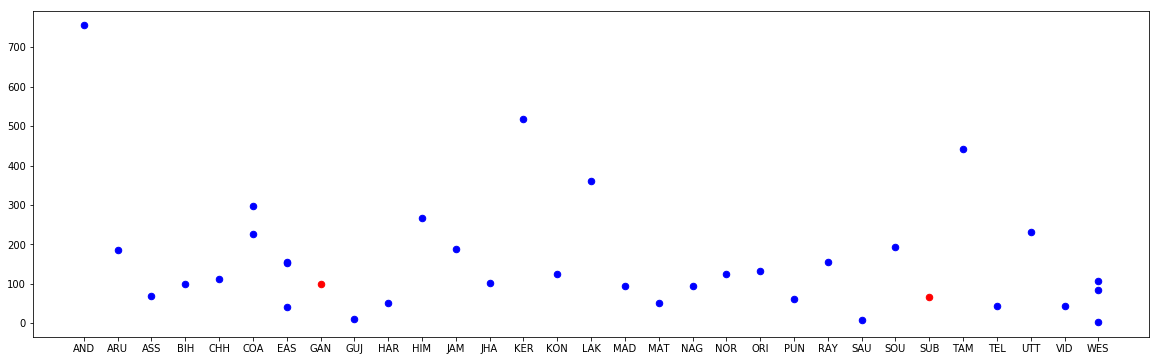

In [15]:
plt.figure(figsize=(20, 6))
for i in range(df_actual.shape[0]):
    plt.plot(df_actual.iloc[i][0][0:3], df_actual.iloc[i][15], marker=".", color=colors[i], ms=13)
    
plt.show()

In [16]:
avg_act = df_actual["Rabi"].mean()
avg_act

160.2611111111111

We can see that the West Bengal regions fall on the lower end of he spectrum when it comes to total rainfall during the Rabi season

In [17]:
df_per_dep = df_per_dep.reset_index()
df_per_dep = df_per_dep.drop(["index"], axis=1)
df_per_dep

,SUBDIVISION,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Rabi,Kharif,Winter,Summer,Autumn
0,ANDAMAN & NICOBAR ISLANDS,Percentage departure,-14.9,-68.9,-100.0,-84.6,-33.1,-11.6,17.6,-19.7,-4.3,39.1,-13.6,-34.5,-92.8,-18.0,-118.3,-129.3,21.2
1,ARUNACHAL PRADESH,Percentage departure,-60.5,9.5,-48.3,-67.3,-17.9,-36.8,-44.6,19.9,-20.9,-82.4,-44.8,-58.8,-237.0,-82.4,-109.8,-122.0,-148.1
2,ASSAM & MEGHALAYA,Percentage departure,-88.4,-12.2,-63.5,-74.9,2.1,-16.8,-25.2,19.6,35.3,-77.4,-89.0,-95.2,-362.2,12.9,-195.8,-89.6,-131.1
3,BIHAR,Percentage departure,26.1,132.3,-17.1,-96.0,97.8,-34.4,-19.0,2.1,-26.9,-24.4,-100.0,-68.2,-34.2,-78.2,90.2,-32.6,-151.3
4,CHHATTISGARH,Percentage departure,-83.9,48.7,38.0,7.2,16.8,-47.2,4.1,-16.3,16.8,22.2,-78.6,-79.0,-170.6,-42.6,-114.2,-23.2,-39.6
5,COASTAL ANDHRA PRADESH,Percentage departure,-95.1,-91.1,-33.1,-77.2,79.6,-63.0,-12.8,1.4,-20.7,5.2,-69.3,-45.5,-295.8,-95.1,-231.7,-60.6,-84.8
6,COASTAL KARNATAKA,Percentage departure,-100.0,-78.1,-68.7,36.2,47.0,-39.8,2.4,58.5,28.3,23.1,-36.6,145.1,-46.5,49.4,-33.0,43.4,14.8
7,EAST MADHYA PRADESH,Percentage departure,66.5,167.5,33.7,-28.6,-73.6,-33.9,-23.9,-37.5,-28.9,43.4,-85.7,49.2,240.9,-124.2,283.2,-136.1,-71.2
8,EAST RAJASTHAN,Percentage departure,350.3,89.0,55.1,141.5,-16.6,-62.7,-11.6,20.8,40.4,-78.0,-100.0,-70.0,191.3,-13.1,369.3,62.2,-137.6
9,EAST UTTAR PRADESH,Percentage departure,200.3,64.1,77.6,-74.0,-38.8,-56.5,-23.7,-50.6,-43.3,73.1,-100.0,41.7,279.2,-174.1,306.1,-169.3,-70.2


In [18]:
colors = []

for i in range(df_per_dep.shape[0]):
    state = df_per_dep.iloc[i][0]
    if(state.find("WEST BENGAL") != -1):
        colors.append("Red")
    else:
        colors.append("Blue")

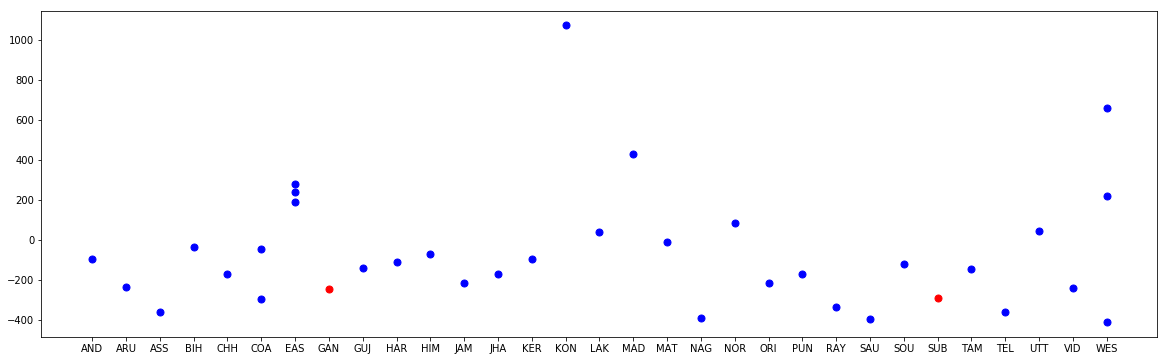

In [19]:
plt.figure(figsize=(20, 6))
for i in range(df_per_dep.shape[0]):
    plt.plot(df_per_dep.iloc[i][0][0:3], df_per_dep.iloc[i][14], marker=".", color=colors[i], ms=14)
    
plt.show()

In [20]:
avg_dep = df_per_dep["Rabi"].mean()
avg_dep

-58.38055555555555

Here both are slightly above the average, nothing too extreme

## Autumn

In [21]:
df_actual

,SUBDIVISION,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Kharif,Rabi,Winter,Summer,Autumn
0,ANDAMAN & NICOBAR ISLANDS,Actual,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4,1618.7,754.7,150.9,665.7,1016.7
1,ARUNACHAL PRADESH,Actual,19.0,101.9,80.3,86.7,299.0,415.8,392.4,599.6,343.0,35.1,20.1,10.2,1750.8,186.3,131.1,801.5,398.2
2,ASSAM & MEGHALAYA,Actual,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,1705.6,68.7,30.7,829.0,458.2
3,BIHAR,Actual,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2,848.5,99.5,51.7,219.8,208.1
4,CHHATTISGARH,Actual,2.3,29.0,21.4,17.3,25.0,104.9,416.7,327.7,252.7,77.9,2.6,1.1,1102.0,112.9,32.4,147.2,333.2
5,COASTAL ANDHRA PRADESH,Actual,0.4,1.2,9.1,6.0,112.9,45.7,151.8,177.8,144.5,195.6,23.7,6.4,519.8,227.3,8.0,164.6,363.8
6,COASTAL KARNATAKA,Actual,0.0,0.3,1.9,40.5,181.9,507.0,1155.4,1121.0,379.3,226.4,40.0,30.8,3162.7,297.5,31.1,729.4,645.7
7,EAST MADHYA PRADESH,Actual,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9,746.6,153.0,94.7,99.4,197.9
8,EAST RAJASTHAN,Actual,28.4,10.0,6.4,7.3,8.4,23.5,197.1,261.0,136.9,3.2,0.0,1.1,618.5,42.7,39.5,39.2,140.1
9,EAST UTTAR PRADESH,Actual,47.4,25.8,15.4,1.7,10.7,47.8,224.5,138.1,106.7,74.7,0.0,8.4,517.1,156.3,81.6,60.2,181.4


In [22]:
colors = []

for i in range(df_actual.shape[0]):
    state = df_actual.iloc[i][0]
    if(state.find("WEST BENGAL") != -1 or state.find("KERALA") != -1 or state.find("MEGHALAYA") != -1 or state.find("BIHAR") != -1):
        colors.append("Red")
    elif(state.find("ASSAM") != -1 or state.find("ORISSA") != -1):
        colors.append("Blue")
    else:
        colors.append("Green")

In [23]:
colors

['Green',
 'Green',
 'Red',
 'Red',
 'Green',
 'Green',
 'Green',
 'Green',
 'Green',
 'Green',
 'Red',
 'Green',
 'Green',
 'Green',
 'Green',
 'Green',
 'Red',
 'Green',
 'Green',
 'Green',
 'Green',
 'Green',
 'Green',
 'Blue',
 'Green',
 'Green',
 'Green',
 'Green',
 'Red',
 'Green',
 'Green',
 'Green',
 'Green',
 'Green',
 'Green',
 'Green']

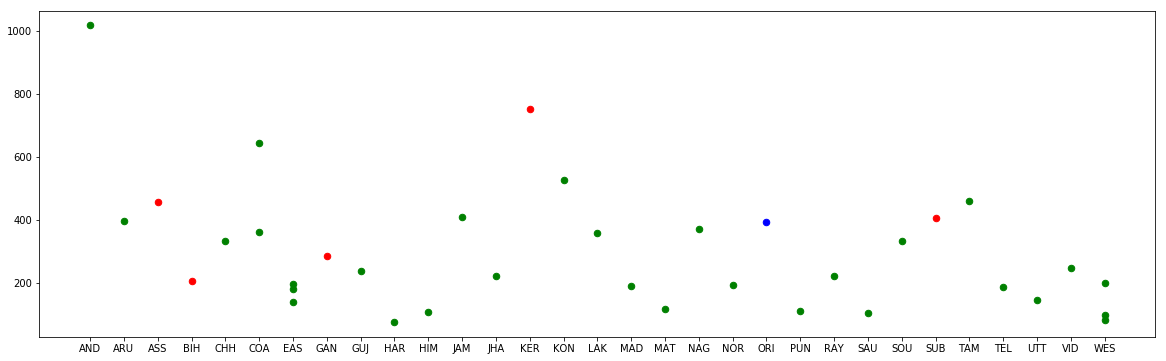

In [24]:
plt.figure(figsize=(20, 6))
for i in range(df_actual.shape[0]):
    plt.plot(df_actual.iloc[i][0][0:3], df_actual.iloc[i][18], marker=".", color=colors[i], ms=13)
    
plt.show()

In [25]:
avg_act = df_actual["Autumn"].mean()
avg_act

300.6388888888889

In [26]:
colors = []

for i in range(df_actual.shape[0]):
    state = df_actual.iloc[i][0]
    if(state.find("WEST BENGAL") != -1 or state.find("KERALA") != -1 or state.find("MEGHALAYA") != -1 or state.find("BIHAR") != -1):
        colors.append("Red")
    elif(state.find("ASSAM") != -1 or state.find("ORISSA") != -1):
        colors.append("Blue")
    else:
        colors.append("Green")

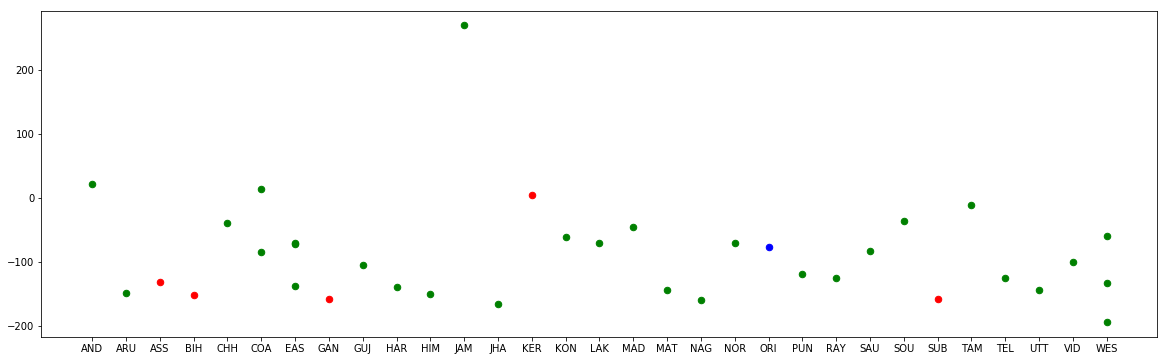

In [27]:
plt.figure(figsize=(20, 6))
for i in range(df_per_dep.shape[0]):
    plt.plot(df_per_dep.iloc[i][0][0:3], df_per_dep.iloc[i][18], marker=".", color=colors[i], ms=13)
    
plt.show()

In [28]:
avg_per_dep = df_per_dep["Autumn"].mean()
avg_per_dep

-87.56944444444446

## Summer

In [29]:
colors = []

for i in range(df_actual.shape[0]):
    state = df_actual.iloc[i][0]
    if(state.find("WEST BENGAL") != -1 or state.find("KERALA") != -1 or state.find("KARNATAKA") != -1 or state.find("ASSAM") != -1 or state.find("BIHAR") != -1 or state.find("MAHARASHTRA") != -1 or state.find("ORRISA") != -1 or state.find("UTTARAKHAND") != -1 or state.find("UTTAR PRADESH") != -1):
        colors.append("Red")
    elif(state.find("MEGHALAYA") != -1):
        colors.append("Blue")
    else:
        colors.append("Green")

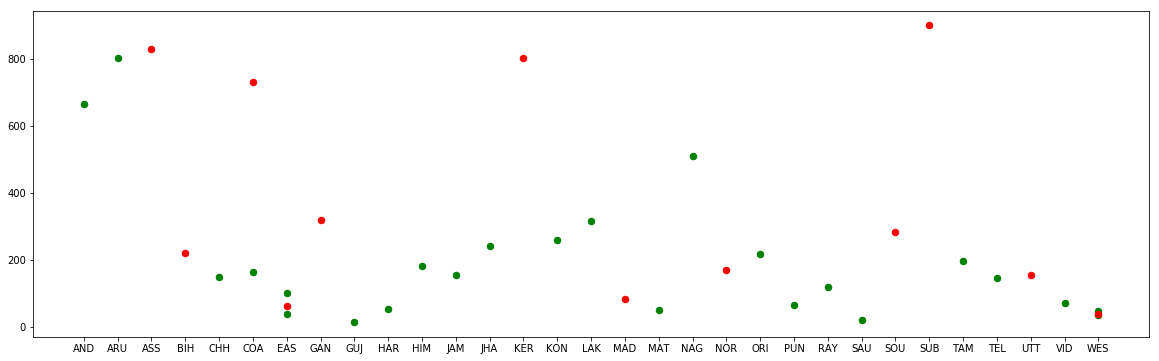

In [30]:
plt.figure(figsize=(20, 6))
for i in range(df_actual.shape[0]):
    plt.plot(df_actual.iloc[i][0][0:3], df_actual.iloc[i][17], marker=".", color=colors[i], ms=13)
    
plt.show()

In [31]:
avg_act = df_actual["Summer"].mean()
avg_act

255.32777777777775

In [32]:
colors = []

for i in range(df_per_dep.shape[0]):
    state = df_per_dep.iloc[i][0]
    if(state.find("WEST BENGAL") != -1 or state.find("KERALA") != -1 or state.find("KARNATAKA") != -1 or state.find("ASSAM") != -1 or state.find("BIHAR") != -1 or state.find("MAHARASHTRA") != -1 or state.find("ORRISA") != -1 or state.find("UTTARAKHAND") != -1 or state.find("UTTAR PRADESH") != -1):
        colors.append("Red")
    elif(state.find("MEGHALAYA") != -1):
        colors.append("Blue")
    else:
        colors.append("Green")

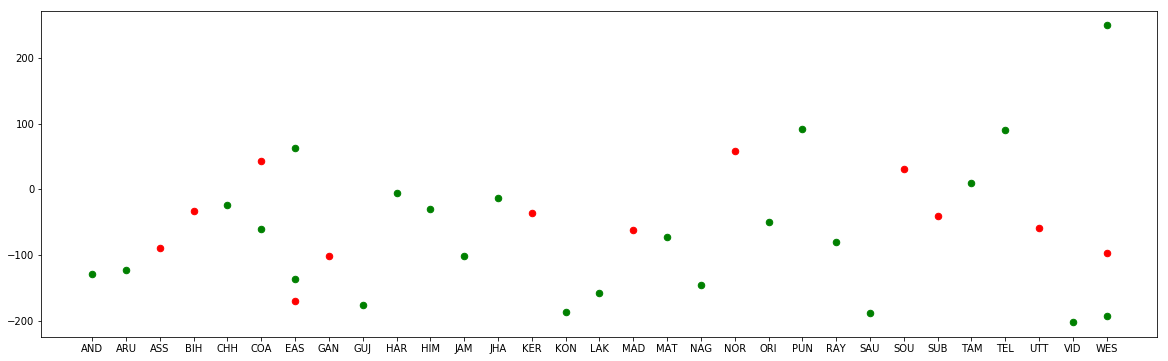

In [33]:
plt.figure(figsize=(20, 6))
for i in range(df_per_dep.shape[0]):
    plt.plot(df_per_dep.iloc[i][0][0:3], df_per_dep.iloc[i][17], marker=".", color=colors[i], ms=13)
    
plt.show()

In [34]:
avg_per_dep = df_per_dep["Autumn"].mean()
avg_per_dep

-87.56944444444446

## Winter

In [35]:
colors = []

for i in range(df_actual.shape[0]):
    state = df_actual.iloc[i][0]
    if(state.find("WEST BENGAL") != -1 or state.find("KERALA") != -1 or state.find("MEGHALAYA") != -1 or state.find("BIHAR") != -1 or state.find("ORRISA") != -1):
        colors.append("Red")
    elif(state.find("ASSAM") != -1 or state.find("ASSAM") != -1):
        colors.append("Blue")
    else:
        colors.append("Green")

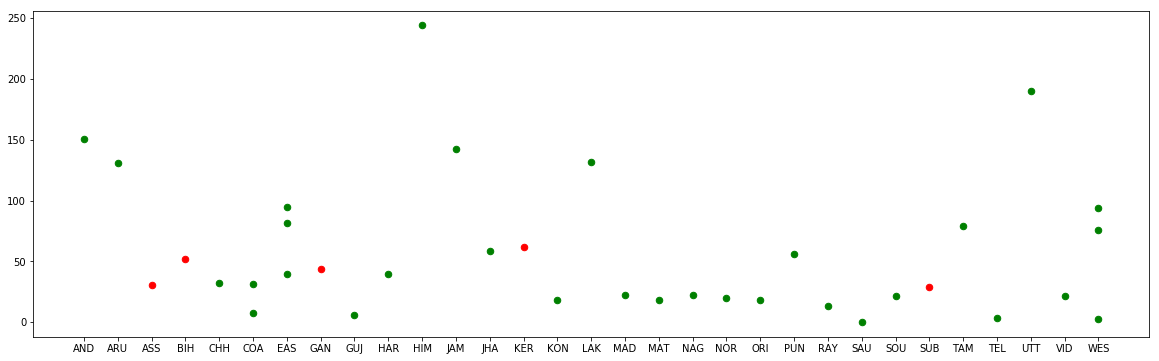

In [36]:
plt.figure(figsize=(20, 6))
for i in range(df_actual.shape[0]):
    plt.plot(df_actual.iloc[i][0][0:3], df_actual.iloc[i][16], marker=".", color=colors[i], ms=13)
    
plt.show()

In [37]:
avg_act = df_actual["Winter"].mean()
avg_act

57.994444444444426

In [38]:
colors = []

for i in range(df_per_dep.shape[0]):
    state = df_per_dep.iloc[i][0]
    if(state.find("WEST BENGAL") != -1 or state.find("KERALA") != -1 or state.find("MEGHALAYA") != -1 or state.find("BIHAR") != -1 or state.find("ORRISA") != -1):
        colors.append("Red")
    elif(state.find("ASSAM") != -1 or state.find("ASSAM") != -1):
        colors.append("Blue")
    else:
        colors.append("Green")

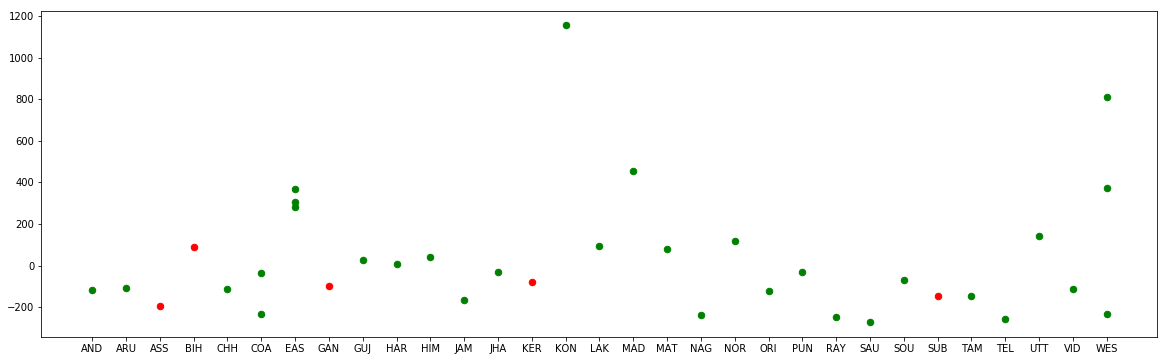

In [39]:
plt.figure(figsize=(20, 6))
for i in range(df_per_dep.shape[0]):
    plt.plot(df_per_dep.iloc[i][0][0:3], df_per_dep.iloc[i][16], marker=".", color=colors[i], ms=13)
    
plt.show()

In [40]:
avg_per_dep = df_per_dep["Winter"].mean()
avg_per_dep

36.58611111111111

## Kharif

In [41]:
colors = []

for i in range(df_actual.shape[0]):
    state = df_actual.iloc[i][0]
    if(state.find("TAMIL NADU") != -1):
        colors.append("Red")
    else:
        colors.append("Green")

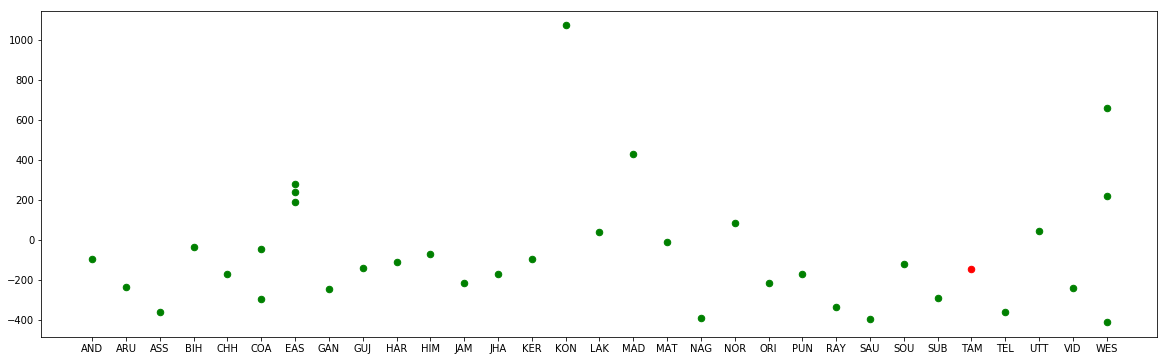

In [42]:
plt.figure(figsize=(20, 6))
for i in range(df_per_dep.shape[0]):
    plt.plot(df_per_dep.iloc[i][0][0:3], df_per_dep.iloc[i][14], marker=".", color=colors[i], ms=13)
    
plt.show()